In [2]:
#데이터 로드
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

file_path = "./kc_house_data.csv"
df = pd.read_csv(file_path)

In [3]:
#결측치 확인
missing_values = df.isnull().sum()
print(missing_values)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 특성(X)과 타겟(y) 데이터 정의
X = df.drop(columns=['price'], axis = 1) 
y = df['price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 타겟 원핫 인코딩
y_train_encoded = to_categorical(y_train)

# 문자열을 datetime 타입으로 변환
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

# 날짜에서 연, 월, 요일 등 파생 컬럼 생성
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek  # 월=0, 일=6
df = df.drop(columns=['date'])

X = df.drop(columns=['price'])
y = df['price']

# train/test 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

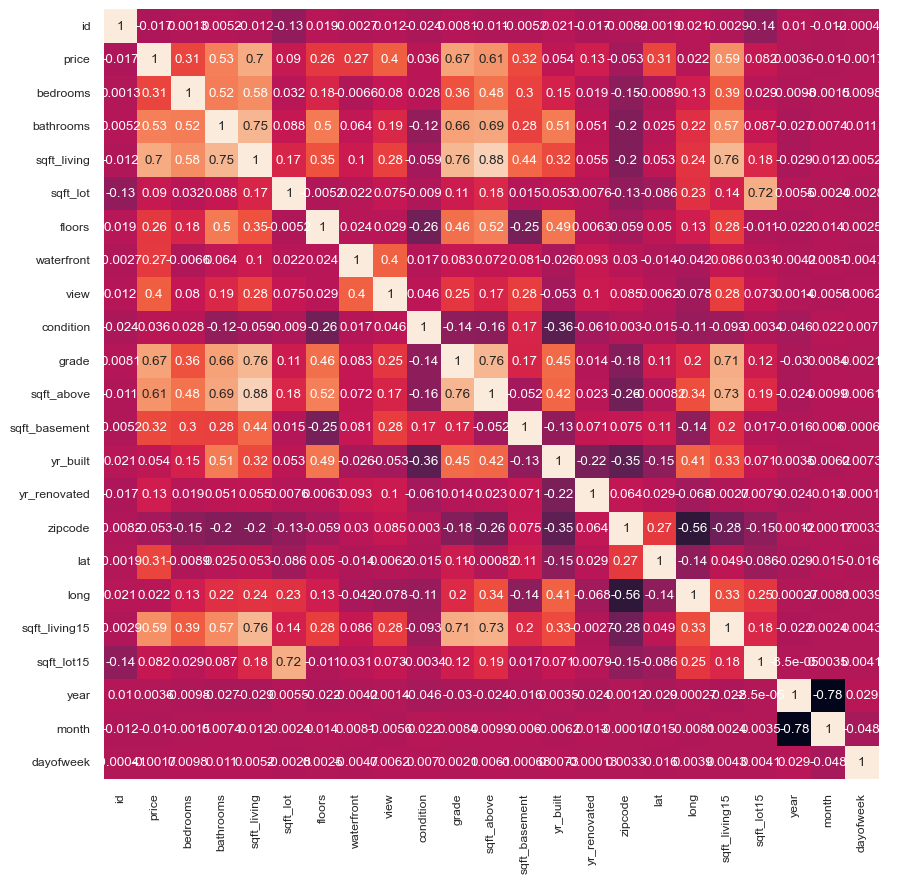

In [9]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 22) (17290,)
(4323, 22) (4323,)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 47957697572.491394
평균제곱근오차 47957697572.491394
평균제곱근오차 47957697572.49127


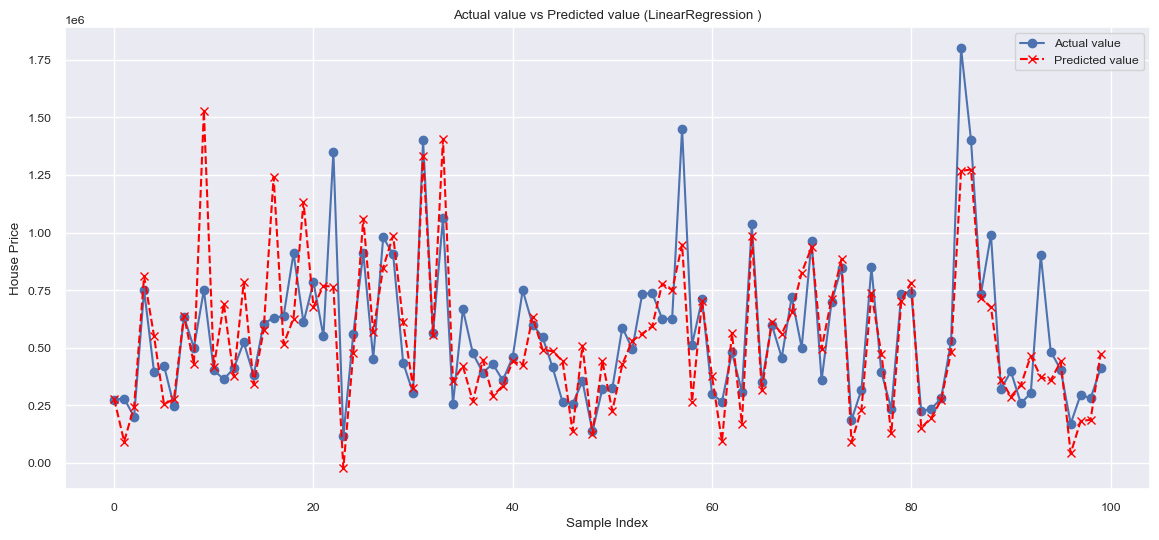

In [12]:
# 예측값과 실제값 중 일부 시각화
plt.figure(figsize=(14, 6))
plt.plot(y_test.values[:100], label='Actual value', marker='o')
plt.plot(ly_preds[:100], label='Predicted value', marker='x', linestyle='--', color='red')
plt.title('Actual value vs Predicted value (LinearRegression )')
plt.xlabel('Sample Index')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 33441897213.643764


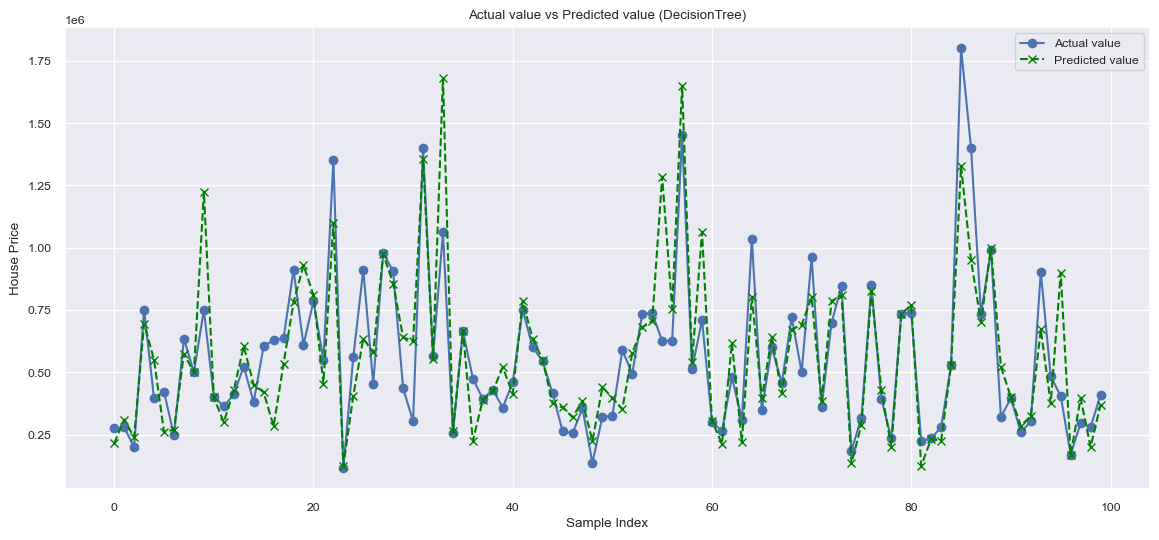

In [14]:
# 예측값과 실제값 중 일부 시각화
plt.figure(figsize=(14, 6))
plt.plot(y_test.values[:100], label='Actual value', marker='o')
plt.plot(dy_preds[:100], label='Predicted value', marker='x', linestyle='--', color='green')
plt.title('Actual value vs Predicted value (DecisionTree)')
plt.xlabel('Sample Index')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 19218770677.85358


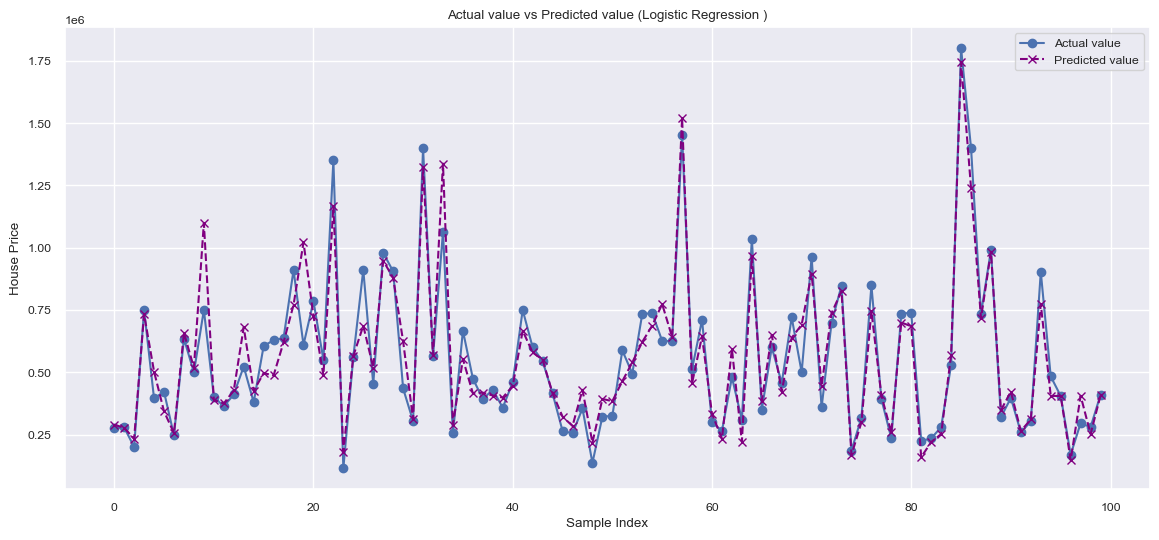

In [22]:
# 예측값과 실제값 중 일부 시각화
plt.figure(figsize=(14, 6))
plt.plot(y_test.values[:100], label='Actual value', marker='o')
plt.plot(ry_preds[:100], label='Predicted value', marker='x', linestyle='--', color='purple')
plt.title('Actual value vs Predicted value (Logistic Regression )')
plt.xlabel('Sample Index')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 1. 스케일링
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()

# 2. SVR 모델 학습
svr_model = SVR(kernel='linear', max_iter = 5000)
svr_model.fit(X_train_scaled, y_train_scaled)

# 3. 예측 후 역정규화
sy_preds_scaled = svr_model.predict(X_test_scaled)
sy_preds = scaler_y.inverse_transform(sy_preds_scaled.reshape(-1, 1)).ravel()

# 4. 평가
print("평균제곱근오차:", mean_squared_error(y_test, sy_preds))


평균제곱근오차: 74601956127.36588


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


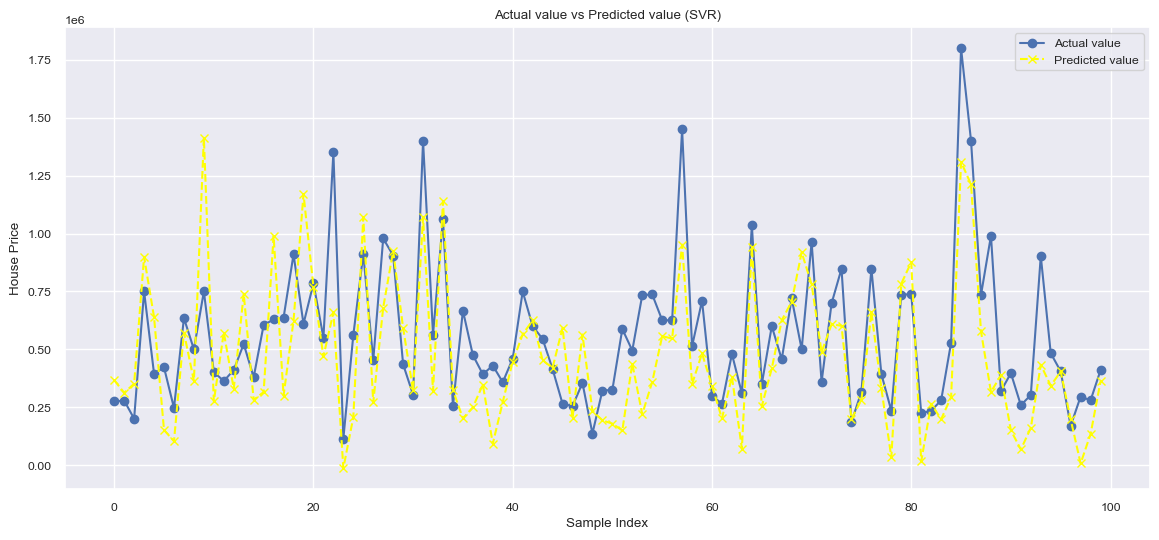

In [44]:
# 예측값과 실제값 중 일부 시각화
plt.figure(figsize=(14, 6))
plt.plot(y_test.values[:100], label='Actual value', marker='o')
plt.plot(sy_preds[:100], label='Predicted value', marker='x', linestyle='--', color='yellow')
plt.title('Actual value vs Predicted value (SVR)')
plt.xlabel('Sample Index')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
import torch
import torch.nn as nn

class HousePriceRegression(nn.Module):
    def __init__(self):
        super(HousePriceRegression, self).__init__()
        self.fc1 = nn.Linear(22, 64)  # 너의 입력 차원에 맞게 수정해야 함
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # 회귀: 출력 1개

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # 회귀이므로 활성화 X
        return x

In [48]:
model = HousePriceRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1))

# 텐서 변환
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

# 모델 재정의
model = HousePriceRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 학습 루프
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.9772
Epoch 10, Loss: 0.7656
Epoch 20, Loss: 0.5488
Epoch 30, Loss: 0.3939
Epoch 40, Loss: 0.3240
Epoch 50, Loss: 0.2864
Epoch 60, Loss: 0.2605
Epoch 70, Loss: 0.2422
Epoch 80, Loss: 0.2282
Epoch 90, Loss: 0.2170


In [ ]:
model.eval()
with torch.no_grad():
    y_preds = model(X_test_tensor).numpy()
    y_preds = scaler_y.inverse_transform(y_preds)  # 다시 원래 스케일로 되돌리기
    y_test_real = scaler_y.inverse_transform(y_test_tensor.numpy())

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test_real, y_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test_real, y_preds)))
print("R²:", r2_score(y_test_real, y_preds))

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(y_test_real[:100], label='Actual', marker='o')
plt.plot(y_preds[:100], label='Predicted', marker='x', linestyle='--', color='orange')
plt.title('Actual vs Predicted (PyTorch)')
plt.xlabel('Sample Index')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.show()